In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using ProgressMeter
using Distributed

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/preprocessing.jl")
include("univariate/ARFB_fast_cos.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [2]:
# signal statistics 
N = 10000
fs = 4

# process parameters
ρ1 = 0.9#99
ρ2 = 0.999
f1 = 0.3
f2 = 1.4
σ_p1 = 0.3
σ_p2 = 0.3
σ_n = 0.001

# create signal (option 1)
si1 = Array{Float64,1}(undef, N)
si2 = Array{Float64,1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si1[1] = 0 
si2[1] = 0 
xi[1] = 0
yi[1] = 0
for n = 2:N
    si1[n] = ρ1*si1[n-1] + rand(Normal(0, σ_p1)) 
    si2[n] = ρ2*si2[n-1] + rand(Normal(0, σ_p2)) 
    xi[n] = si1[n]*cos(2*pi*f1/fs*n) + si2[n]*cos(2*pi*f2/fs*n)
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

In [3]:
f = collect(0.2:0.1:2)
#f = [0.3, 1.5]
bufsize = length(f)*2

# create fg
eval(generateARFB(length(f), bufsize))
ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 4424043613686703496 -->
 4424043613686703496 
 
 placeholder_Σ_smin 
 
<!-- 18165982437900971212 -->
 18165982437900971212 
 
 placeholder_μ_θ 
 
<!-- 1614395993706191925 -->
 1614395993706191925 
 
 placeholder_a_γ 
 
<!-- 9399127633220240588 -->
 9399127633220240588 
 
 × 
 multiplication_1 
 
<!-- 8496139159369535149 -->
 8496139159369535149 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 9399127633220240588--8496139159369535149 -->
 9399127633220240588--8496139159369535149 
 
 s 
 1 y 
 2 in1 
 
<!-- 5143911252022048299 -->
 5143911252022048299 
 
 placeholder_c 
 
<!-- 9399127633220240588--5143911252022048299 -->
 9399127633220240588--5143911252022048299 
 
 c 
 1 out 
 3 a 
 
<!-- 232825240793534922 -->
 232825240793534922 
 
 placeholder_y 
 
<!-- 4496634543691297574 -->
 4496634543691297574 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 232825240793534922--4496634543691297574 -->
 232825240793534922--4496634543691297574 
 
 y 
 1 out 
 1 out 
 
<!-- 234690843593910037 -->
 234690843593910037 
 
 placeholder_Σ_x 
 
<!-- 820136742895095916 -->
 820136742895095916 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 8496139159369535149--820136742895095916 -->
 8496139159369535149--820136742895095916 
 
 smin 
 1 out 
 2 x 
 
<!-- 14681496855749933843 -->
 14681496855749933843 
 
 GammaVector 
 gammavector_1 
 
<!-- 8496139159369535149--14681496855749933843 -->
 8496139159369535149--14681496855749933843 
 
 γ 
 1 out 
 4 γ 
 
<!-- 5549324107291311679 -->
 5549324107291311679 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 8496139159369535149--5549324107291311679 -->
 8496139159369535149--5549324107291311679 
 
 θ 
 1 out 
 3 θ 
 
<!-- 820136742895095916--4424043613686703496 -->
 820136742895095916--4424043613686703496 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 15428369887019448148 -->
 15428369887019448148 
 
 placeholder_μ_smin 
 
<!-- 820136742895095916--15428369887019448148 -->
 820136742895095916--15428369887019448148 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 14681496855749933843--1614395993706191925 -->
 14681496855749933843--1614395993706191925 
 
 a_γ 
 1 out 
 2 a 
 
<!-- 11608464742847349122 -->
 11608464742847349122 
 
 placeholder_b_γ 
 
<!-- 14681496855749933843--11608464742847349122 -->
 14681496855749933843--11608464742847349122 
 
 b_γ 
 1 out 
 3 b 
 
<!-- 5549324107291311679--18165982437900971212 -->
 5549324107291311679--18165982437900971212 
 
 μ_θ 
 1 out 
 2 m 
 
<!-- 5446196908802884807 -->
 5446196908802884807 
 
 placeholder_Σ_θ 
 
<!-- 5549324107291311679--5446196908802884807 -->
 5549324107291311679--5446196908802884807 
 
 Σ_θ 
 1 out 
 3 v 
 
<!-- 4496634543691297574--9399127633220240588 -->
 4496634543691297574--9399127633220240588 
 
 x 
 1 out 
 2 m 
 
<!-- 4496634543691297574--234690843593910037 -->
 4496634543691297574--234690843593910037 
 
 Σ_x 
 1 out 
 3 v

In [4]:
# generate algorithm
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaVectorOut(nothing, ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:a_γ]), ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:b_γ]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:θ], nothing)

marginals[:γ] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:θ], marginals[:γ])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(MatrixVariate, PointMass, m=data[:Σ_x]))
messages[4] = ruleSP

In [13]:
μ_θ_mem = Array{Float64,2}(undef, N, length(f))
Σ_θ_mem = Array{Float64,2}(undef, N, length(f))
m_γ_mem = Array{Float64,2}(undef, N, length(f))
μ_x_mem = Array{Float64,1}(undef, N)
Σ_x_mem = Array{Float64,1}(undef, N)

# priors
μ_smin = zeros(length(f))
Σ_smin = 0.1*Ic(length(f))
μ_θ = 1.0*ones(length(f))
Σ_θ = 1*Ic(length(f))
a_γ = 1.0*ones(length(f))
b_γ = 0.001*ones(length(f))
Σ_x = 0.01*0.01*Ic(bufsize)

p = Progress(N-bufsize)

marginals = Dict()

for n = bufsize:N
    
    next!(p)
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_smin, v=Σ_smin)
    marginals[:θ] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ, v=Σ_θ)
    marginals[:γ] = ProbabilityDistribution(ForneyLab.Multivariate, GammaVector, a=a_γ, b=b_γ)
    
    # fill data dictionary
    data = Dict()
    data[:μ_smin] = μ_smin
    data[:Σ_smin] = Σ_smin
    data[:μ_θ] = μ_θ
    data[:Σ_θ] = Σ_θ
    data[:a_γ] = a_γ
    data[:b_γ] = b_γ
    data[:c] = cos.(2*pi*f*t[n-bufsize+1:n]')'
    data[:Σ_x] = Σ_x*Ic(bufsize)
    data[:y] = yi[n-bufsize+1:n]   
    
    # make prediction
    messages = Array{Message}(undef, 4)
    Base.invokelatest(steps!, data, marginals, messages)
    μ_x_mem[n] = ForneyLab.unsafeMean(messages[2].dist)[end]
    Σ_x_mem[n] = ForneyLab.unsafeCov(messages[2].dist)[end,end]
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepθ!, data, marginals)
        Base.invokelatest(stepγ!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    μ_smin = ForneyLab.unsafeMean(marginals[:s])
    Σ_smin = ForneyLab.unsafeCov(marginals[:s])
    μ_θ = ForneyLab.unsafeMean(marginals[:θ])
    Σ_θ = ForneyLab.unsafeCov(marginals[:θ])
    a_γ = marginals[:γ].params[:a]
    b_γ = marginals[:γ].params[:b]

    # save parameters
    μ_θ_mem[n,:] = μ_θ
    Σ_θ_mem[n,:] = diag(Σ_θ)
    m_γ_mem[n,:] = a_γ ./ b_γ
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:22


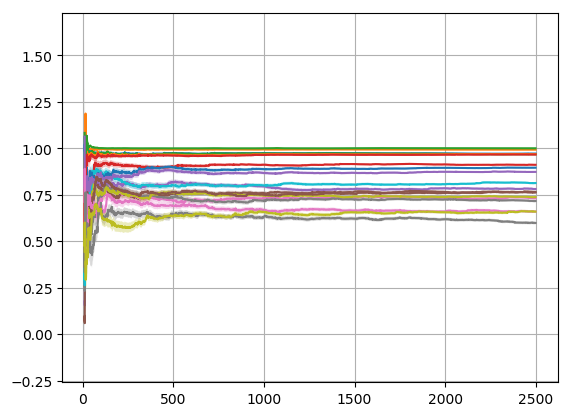

In [14]:
for k = 1:size(μ_θ_mem,2)
    plt.plot(t[bufsize:end], μ_θ_mem[bufsize:end,k])
    plt.fill_between(t[bufsize:end], μ_θ_mem[bufsize:end,k].+sqrt.(Σ_θ_mem[bufsize:end,k]), μ_θ_mem[bufsize:end,k].-sqrt.(Σ_θ_mem[bufsize:end,k]), alpha=0.3)
end
plt.grid()

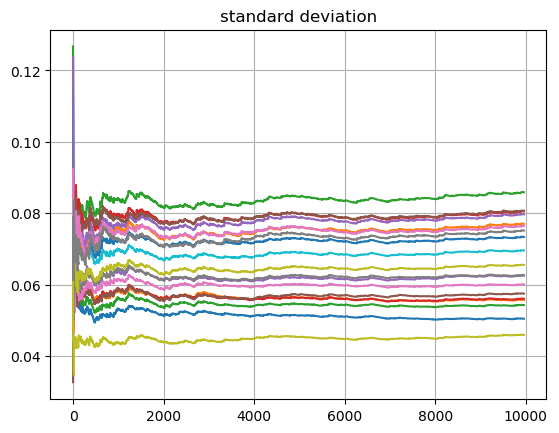

(nothing, PyObject Text(0.5, 1.0, 'standard deviation'))

In [15]:
plt.plot(1 ./ sqrt.(m_γ_mem[bufsize:end,:]))
plt.grid(), plt.title("standard deviation")

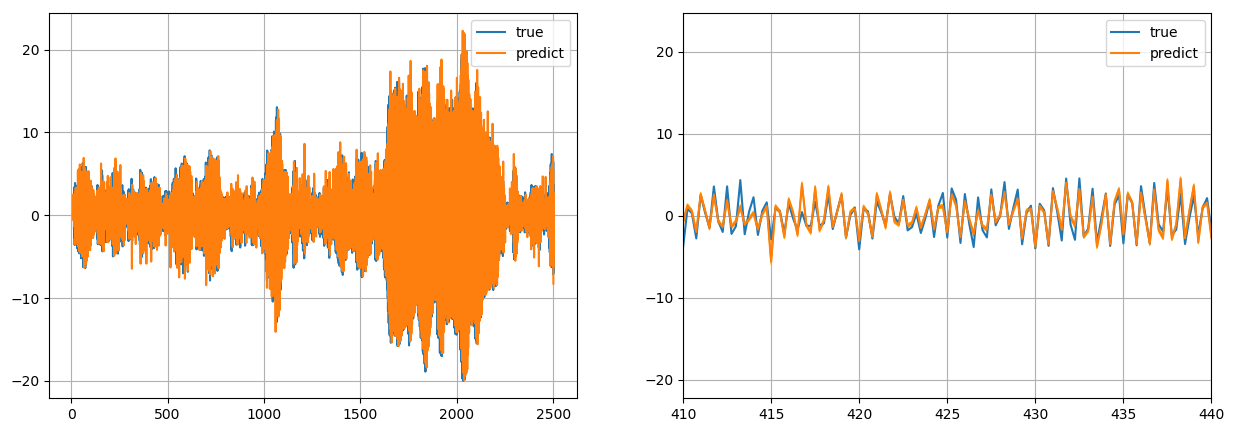

(nothing, PyObject <matplotlib.legend.Legend object at 0x0000000065FDCA90>, (410, 440))

In [16]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(t[bufsize:end], xi[bufsize:end], label="true")
ax[1].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[1].grid(), ax[1].legend()
ax[2].plot(t[bufsize:end], xi[bufsize:end], label="true")
ax[2].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[2].fill_between(t[bufsize:end], μ_x_mem[bufsize:end] .+ sqrt.(Σ_x_mem[bufsize:end]), μ_x_mem[bufsize:end] .- sqrt.(Σ_x_mem[bufsize:end]), color="orange")
ax[2].grid(), ax[2].legend(), ax[2].set_xlim(410,440)

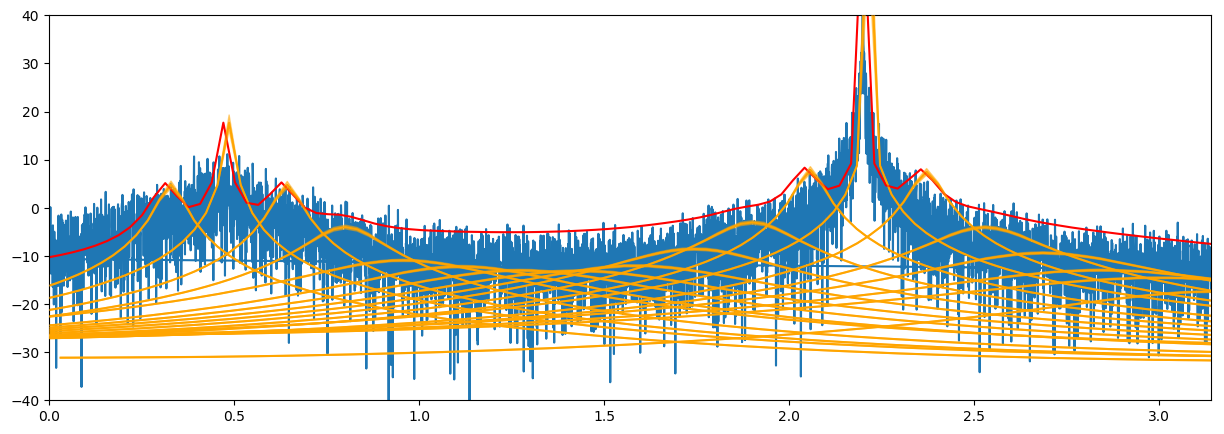

(0, 3.141592653589793)

In [17]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
for k = 1:length(f)
    θ_sampled, γ_sampled = AR_distributions([μ_θ_mem[end,k]], mat(1/Σ_θ_mem[end,k]), a_γ[k], b_γ[k])
    mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    θx = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(θx, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(f[k]/fs*200)):201-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 40)

plt.xlim(0,pi)

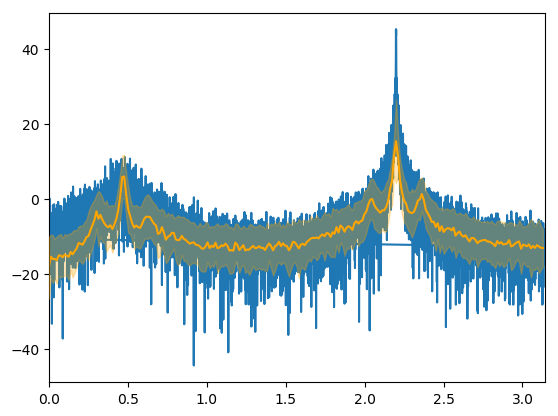

In [26]:
# generation:
Ni = 500 # (nr samples + frequency resolution)
Mi = 100 # nr of iterations

# get parameters
μ_θi, Σ_θi = ForneyLab.unsafeMean(marginals[:θ]), ForneyLab.unsafeCov(marginals[:θ])
a_γi, b_γi = marginals[:γ].params[:a], marginals[:γ].params[:b]


function generate1psd(μ_θi, Σ_θi, a_γi, b_γi, N, fs, f)
    # create signal (option 1)
    sif = Array{Float64,2}(undef, length(f), N)
    xif = Array{Float64,1}(undef, N)
    sif[:,1] = zeros(length(f))
    xif[1] = 0
    for n = 2:N
        ws = rand(MvNormal(zeros(length(f)), diagm([1/rand(Distributions.Gamma(a_γi[k], 1/b_γi[k])) for k = 1:length(f)])))
        θs = rand(MvNormal(μ_θi, collect(Hermitian(Σ_θi))))
        #ws = rand(MvNormal(zeros(length(f)), collect(Hermitian(inv(rand(Distributions.Wishart(nu_wi, collect(Hermitian(v_wi)))))))))
        sif[:,n] = θs.*sif[:,n-1] + ws
        xif[n] = sif[:,n]'*cos.(2*pi*f/fs*n) 
    end
    return xif
end

function approxpsd(M, μ_θi, Σ_θi, a_γi, b_γi, N, fs, f)
    psd = Array{Float64,2}(undef, M, N) 
    for m = 1:M
        xif = generate1psd(μ_θi, Σ_θi, a_γi, b_γi, N, fs, f)
        psd[m,:] = 10*log10.((abs.(FFTW.fft(xif)).^2)./length(xif))
    end
    return squeeze(mean(psd, dims=1)), squeeze(std(psd, dims=1))
end

mean_psd, std_psd = approxpsd(Mi, μ_θi, Σ_θi, a_γi, b_γi, Ni, fs, f)
mean_psd = mean_psd[1:Int(floor(Ni/2))]
std_psd = std_psd[1:Int(floor(Ni/2))]
plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))
plt.plot(FFTW.fftfreq(Ni, fs)[1:Int(floor(Ni/2))]/fs*2*pi, mean_psd, color="orange")
plt.fill_between(FFTW.fftfreq(Ni, fs)[1:Int(floor(Ni/2))]/fs*2*pi, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.3, zorder=100)
plt.xlim(0,pi)

;

## Predictive performance

In [19]:
x_true = xi[bufsize:end]
x_μ_pred = μ_x_mem[bufsize:end]
x_σ_pred = sqrt.(abs.(Σ_x_mem[bufsize:end]));

In [20]:
MSE = mean(abs2.(x_true - x_μ_pred))
MAE = mean(abs.(x_true - x_μ_pred))
BME = mean([logpdf(Normal(x_μ_pred[k], x_σ_pred[k]), x_true[k]) for k = 1:length(x_true)])

MSE, MAE, BME

(1.1932944443027593, 0.8072552873810578, -12.386079563518868)

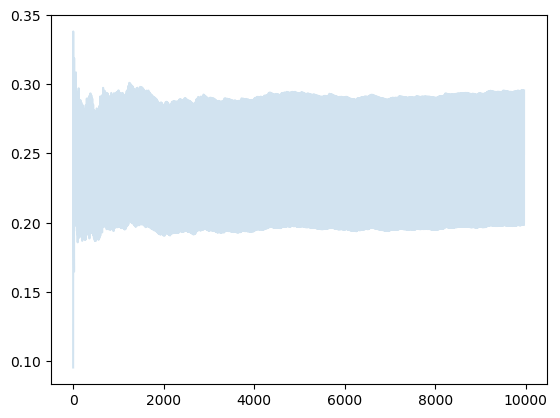

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000667FC5F8>

In [28]:
plt.plot(sqrt.(Σ_x_mem[bufsize:end]), alpha=0.2)